In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train.shape , test.shape

((2000, 21), (1000, 21))

In [5]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [7]:
# finding missing values
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
test.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [9]:
#finding categorical columns

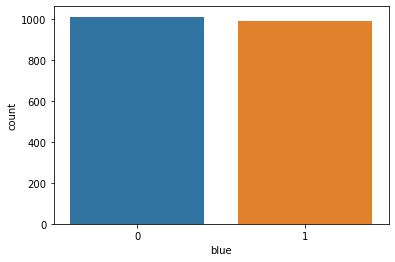

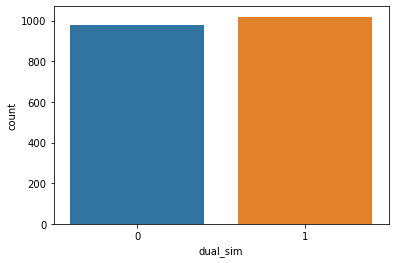

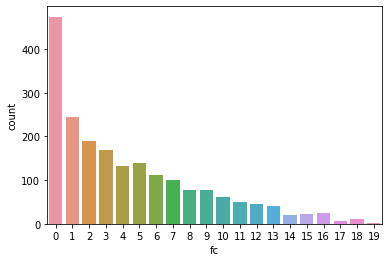

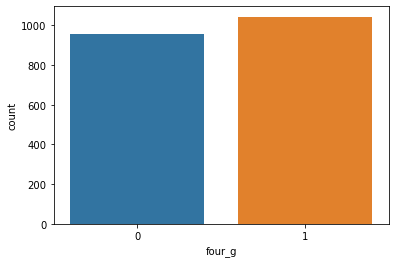

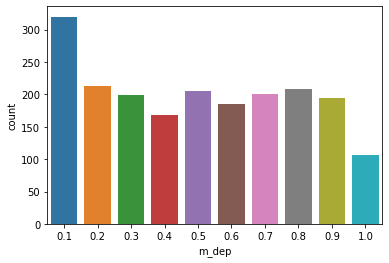

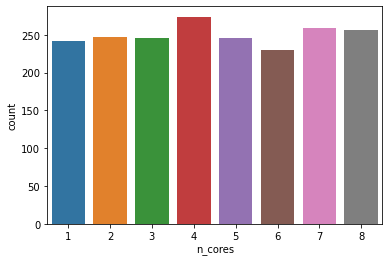

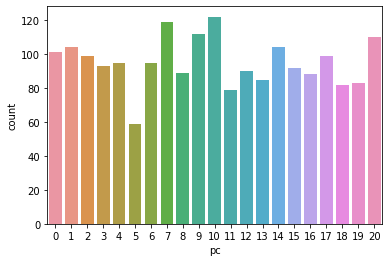

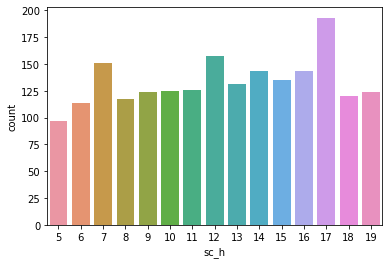

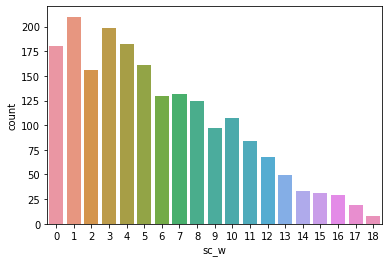

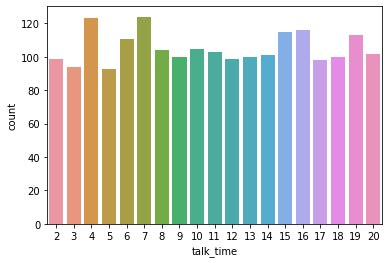

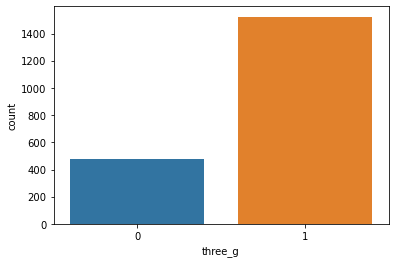

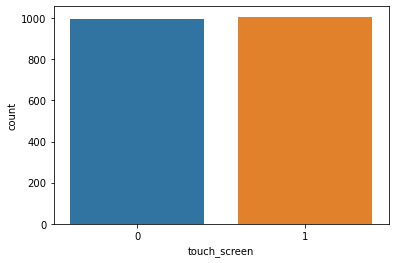

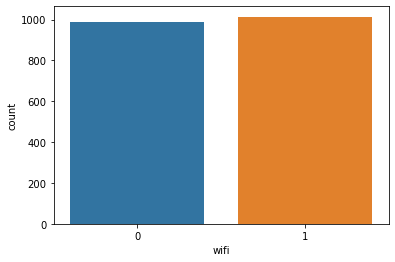

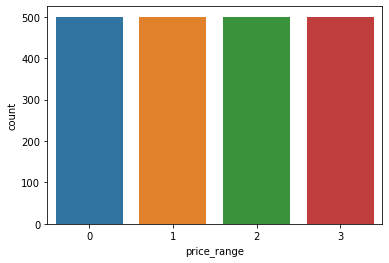

In [10]:
for i in train:
    if train[i].nunique() <25:
        sns.countplot(x= train[i])
        plt.show()

In [11]:
correlation = train.corr()['price_range'].sort_values()
correlation

touch_screen    -0.030411
mobile_wt       -0.030302
clock_speed     -0.006606
m_dep            0.000853
n_cores          0.004399
four_g           0.014772
dual_sim         0.017444
wifi             0.018785
blue             0.020573
talk_time        0.021859
fc               0.021998
sc_h             0.022986
three_g          0.023611
pc               0.033599
sc_w             0.038711
int_memory       0.044435
px_height        0.148858
px_width         0.165818
battery_power    0.200723
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

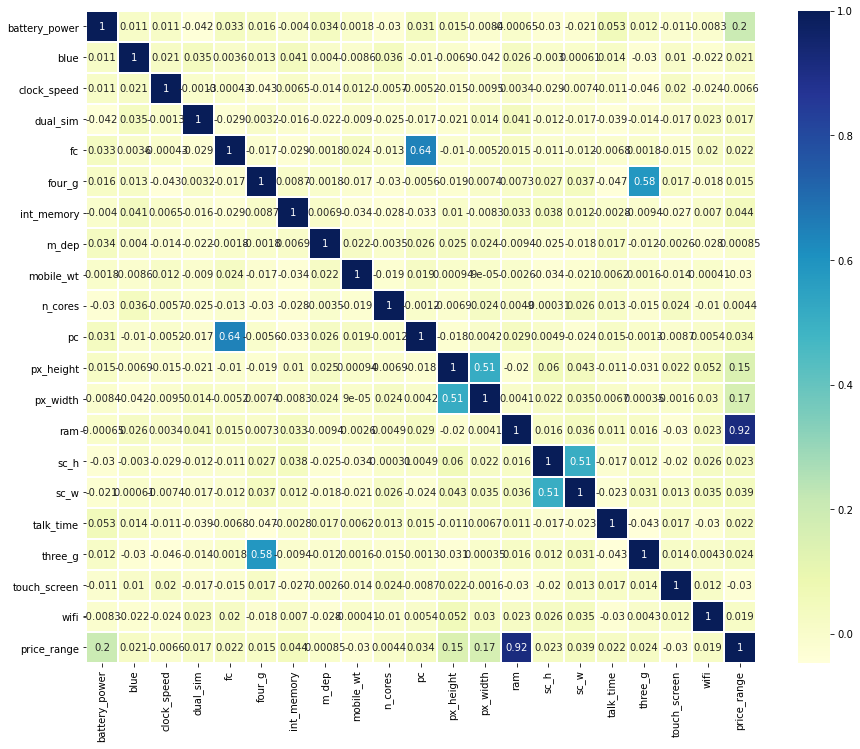

In [12]:
#creating heatmap for corelation
 

plt.figure(figsize=(15,12))
sns.heatmap(data=train.corr(), annot=True, cmap='YlGnBu',linecolor="white",linewidths=1)

ram has significant impact on price range of mobile prices

In [13]:
#now converting catergorical features into numerical using pd.get_dummies()

categorical_columns = [
    "blue", "dual_sim",'four_g','three_g','touch_screen','wifi'
]

In [14]:
# NOW WE CAN MAKE NEW FEATURE USING SCREEN HEIGHT AND SCREEN WIDTH 

train['sc_h'].value_counts()

17    193
12    157
7     151
16    143
14    143
15    135
13    131
11    126
10    125
19    124
9     124
18    120
8     117
6     114
5      97
Name: sc_h, dtype: int64

In [15]:
train['sc_w'].value_counts()

1     210
3     199
4     182
0     180
5     161
2     156
7     132
6     130
8     125
10    107
9      97
11     84
12     68
13     49
14     33
15     31
16     29
17     19
18      8
Name: sc_w, dtype: int64

In [16]:
train['sc_a'] = train['sc_h']*train['sc_w']

In [17]:
test['sc_a'] = test['sc_h']*test['sc_w']

In [18]:
#similarly we can make px_area using px_height and px_width
 
train['px_area'] = train['px_height']*train['px_width']
test['px_area'] = test['px_height']*test['px_width']

In [19]:
train.shape , test.shape

((2000, 23), (1000, 23))

In [20]:
test.drop('id', axis = 1, inplace= True)

In [21]:
train = pd.get_dummies(data= train, columns=categorical_columns)
test = pd.get_dummies(data= test, columns=categorical_columns)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
X = train.drop('price_range',axis =1).values
y = train['price_range'].values

In [24]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [27]:
models = [LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]

model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc = []
d = {}

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    acc.append(accuracy_score(pred,y_test))
    
d = {'Model':model_names,'Accuracy':acc}
d

D:\priyam\pythontools\envs\Tensorflow\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'Model': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.962, 0.864, 0.86, 0.428, 0.868, 0.83, 0.918, 0.838]}

In [28]:
model_accuracry = pd.DataFrame(d)

In [29]:
model_accuracry.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,LogisticRegression,0.962
6,GradientBoostingClassifier,0.918
4,RandomForestClassifier,0.868
1,LinearSVM,0.864
2,rbfSVM,0.860
7,GaussianNB,0.838
5,DecisionTree,0.830
3,KNearestNeighbors,0.428


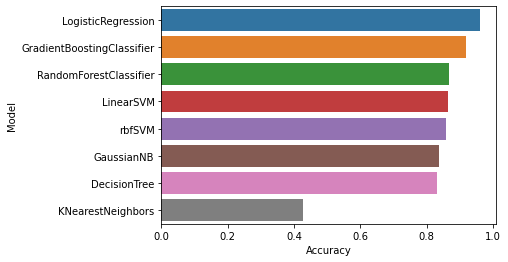

In [30]:
sns.barplot(x='Accuracy', y='Model', data = model_accuracry.sort_values(by='Accuracy', ascending=False))

D:\priyam\pythontools\envs\Tensorflow\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x864 with 0 Axes>

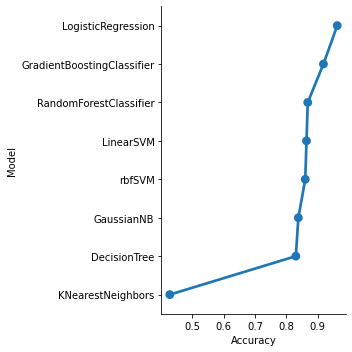

In [31]:
plt.figure(figsize=(15,12))
sns.factorplot(x='Accuracy', y='Model', data = model_accuracry.sort_values(by='Accuracy', ascending=False))

In [36]:
#hyper tuning logistic Regression model 

logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [39]:
prediction = logistic_model.predict(X_test);

In [42]:
print(accuracy_score(prediction,y_test)*100)

96.2


In [35]:
from sklearn.model_selection import GridSearchCV
SEED = 42
cross_valid_scores = {}

parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2"]
}

model_logistic_regression = LogisticRegression(
    random_state=SEED,
    class_weight="balanced",
    solver="liblinear"
)

model_logistic_regression = GridSearchCV(
    model_logistic_regression, 
    parameters, 
    cv=5,
    scoring='accuracy')

model_logistic_regression.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_logistic_regression.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_logistic_regression.best_score_:.3f}'
)

cross_valid_scores['logistic_regression'] = model_logistic_regression.best_score_
print('-----')

-----
Best parameters {'C': 1.0, 'penalty': 'l1'}
Mean cross-validated accuracy score of the best_estimator: 0.835
-----


In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [45]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.94      0.94      0.94       110
           2       0.96      0.93      0.94       125
           3       0.97      0.99      0.98       141

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [47]:
confusion_mat = print(confusion_matrix(y_test,prediction))

[[122   2   0   0]
 [  3 103   4   0]
 [  0   5 116   4]
 [  0   0   1 140]]
